## X-Forum, Projet de MAP

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from collections import Counter
from numpy import cumsum
from scipy import stats
from scipy.stats import norm

In [22]:
#take one random goodie from 2 boxes (first strategy)
def choose_a_goodie_first_st(L, n): #L - list of n elements, n - number of colors
    i = random.randint(0, n-1)
    L[i] -= 1
    return L
    
#take one random goodie from 1 box (second strategy)
def choose_a_goodie_second_st(L, n): #L - list of n elements, n - number of colors
    all_goodies = np.sum(L)
    p = list(1.0*L / all_goodies) #probability of taking from i-th box is L[i] / all_goodies
    #i = np.random.choice(n, 1, p)[0] apparently it doesn't work properly
    custm = stats.rv_discrete(name='custm', values=(np.arange(n), p))
    i = custm.rvs(size=1)
    L[i] -= 1
    return L

#take one random goodie from 1 box with 2 colors (second strategy)
def choose_a_goodie_second_st2(L): #L - list of two elements, first 
    p = 1.0*L[0]/(L[0]+L[1]) # probability of taking read goodie
    i = np.random.binomial(1, p) #i = 1 with proba p et i = 0 with proba 1-p
    if i == 0:
        return [L[0], L[1]-1]
    else:
        return [L[0]-1, L[1]]
    
def choose_a_goodie(L, n, s): # L - list of n elements, n - number of colors, s - strategy (1 or 2)
    if s == 1:
        return choose_a_goodie_first_st(L, n)
    if s == 2:
        if (n > 2):
            return choose_a_goodie_second_st(L, n)
        if (n == 2):
            return choose_a_goodie_second_st2(L)

In [10]:
#n - number of colors, N - number of goodies of each color, s - strategy (1 or 2)
#return one realisation of chosen random variable
def generate_random_variable(n, N, s):
    boxes = N*np.ones(n, dtype=np.int)
    variable = 0
    #taking goodies while there are in both boxes
    while all(box > 0 for box in boxes):
        boxes = choose_a_goodie(boxes, n, s)
    variable = np.sum(boxes)
    return variable

#n - number of colors, N - number of goodies of each color, k - number of simulations, s - strategy (1 or 2)
#returns array of realisations of chosen random variable
def make_simulations(n, N, k, s):
    variables = np.zeros(k) #number of goodies left at the end
    for i in range(k): #i - index of the simulation
        variables[i] = generate_random_variable(n, N, s)
    return variables

#!!!counts empirical probabilities by given sample with addinig missing values; variables must be an array of int
def values_and_empirical_probabilities(variables):
    c = Counter(variables)
    k = len(variables)
    max_number_of_goodies_left = int(max(c.keys()))
    all_possible_numbers_of_goodies_left = range(1, 1 + max_number_of_goodies_left)
    res = np.zeros(max_number_of_goodies_left + 1)

    for i in all_possible_numbers_of_goodies_left:
        res[i] = c[i]
    probability = (1.0/k)*np.array(res[1:max_number_of_goodies_left + 1])
    
    return (np.array(all_possible_numbers_of_goodies_left), probability)

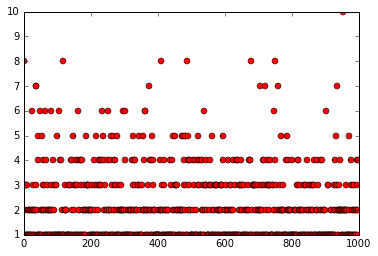

In [24]:
n = 2 #number of colors
N = 1000 #number of goodies of each color
k = 1000 #number of simulations
s = 2 # strategy
coefficient = 1
if s == 1:
    coefficient = 1.0/math.sqrt(N)

variables = make_simulations(n, N, k, s)
plt.plot(np.arange(k), coefficient*variables, 'ro')

<Container object of 10 artists>

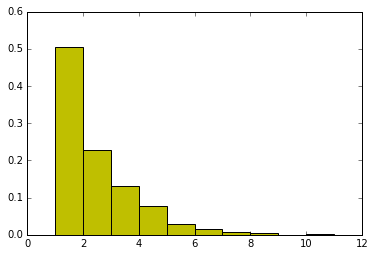

In [25]:
all_possible_numbers_of_goodies_left, probability = values_and_empirical_probabilities(variables)

width = 1
if s == 1:
    width = 10.0/len(all_possible_numbers_of_goodies_left)

plt.bar(coefficient*all_possible_numbers_of_goodies_left, probability, width=width, color='y')

<Container object of 10 artists>

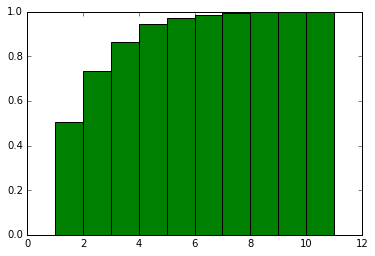

In [26]:
CDF = np.cumsum(probability) #cumulative distribution function
plt.bar(coefficient*all_possible_numbers_of_goodies_left, CDF, width=width, color='g')

<Container object of 10 artists>

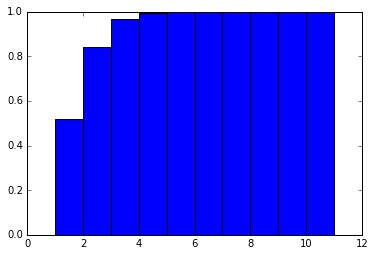

In [27]:
#attention - it's only for s = 1 (almost gauss)
if (s == 1):
    sqrt2 = math.sqrt(2)
    plt.bar(coefficient*all_possible_numbers_of_goodies_left, 2*norm.cdf(coefficient*all_possible_numbers_of_goodies_left, 0, sqrt2)-1, width=width, color='b')

In [28]:
sum_of_variables = coefficient*sum(variables)
expectation = sum_of_variables / k
print expectation

2.003


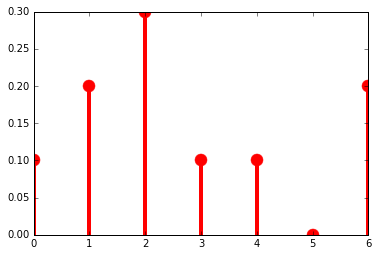

In [29]:
#an example of stats.rv_discrete, don't need for project
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
custm = stats.rv_discrete(name='custm', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()